## Chapter 7 - Problem 12
***

**12.** This problem is a continuation of the previous exercise. In a toy
example with p = 100, show that one can approximate the multiple
linear regression coefficient estimates by repeatedly performing simple
linear regression in a backfitting procedure. How many backfitting
iterations are required in order to obtain a “good” approximation to
the multiple regression coefficient estimates? Create a plot to justify
your answer.

In [122]:
n = 1000
p = 100

set.seed(150)
x <- matrix(nrow = n, ncol = p)

means <- sample(seq(50),n,replace = TRUE)
standard.error <- sample(seq(10),n,replace = TRUE)

for (i in 1:p){    
    x[,i] <- rnorm(n,mean = means[i],sd = standard.error[i])
}

coefs <- as.matrix(sample(seq(from = -10,to = 10),p,replace = TRUE))
eps <- rnorm(n)
y <- x %*% coefs +eps

In [123]:
maxiter = 100
beta <- rep(0,p)
errors <- rep(NA,maxiter)
errors[1] <- mean((y-x %*% beta)^2)
thresh <- 1e-7

for (i in 1:maxiter){
    
    for (j in 1:p){
        a = y - x %*% beta + beta[j]*x[, j]
        beta[j] = lm(a ~ x[, j])$coef[2]
    }
    
    errors[i+1] = mean((y - x %*% beta)^2)
    if (abs(errors[i]-errors[i+1]) < thresh){
        break
    } 
}

errors <- na.omit(errors)

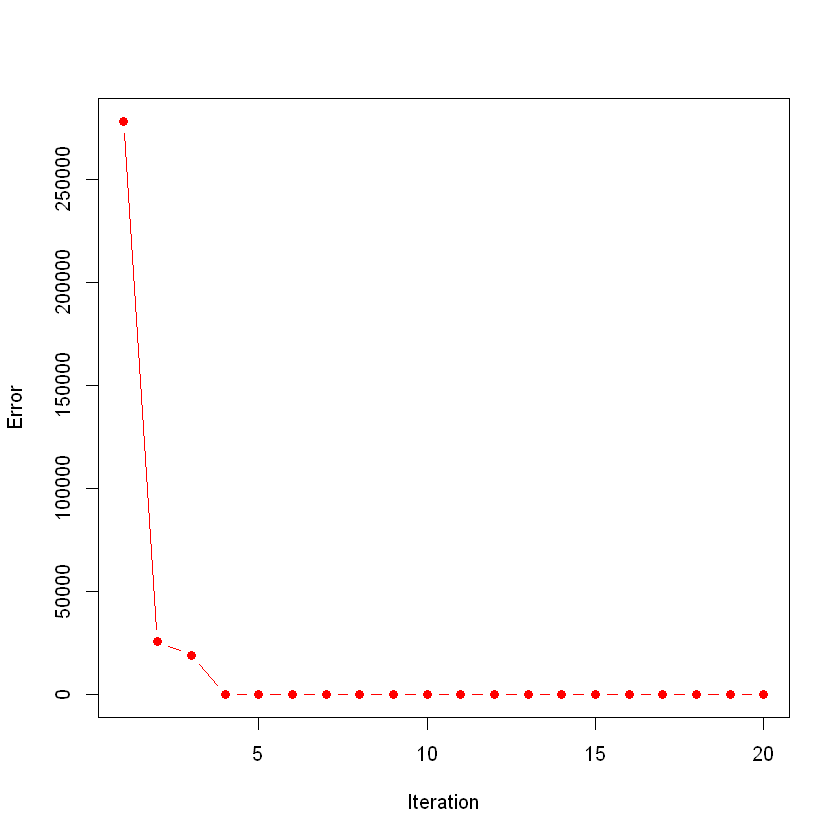

In [124]:
plot(errors[1:length(errors)],type = 'b', col = "red",pch = 19, xlab = "Iteration",ylab = "Error")

In [143]:
model.full <- lm(y~x)

for (i in 1:100){
    beta.mlr[i] <- model.full$coef[i+1]
} 

coef.error <- mean((beta.mlr - coefs)^2)
coef.error

[1] 0.0001447713